1. Correlation between Music types and RT

ANOVA F-statistic: 0.59, p-value: 0.5538
No significant differences detected in reaction time (RT) based on music type.


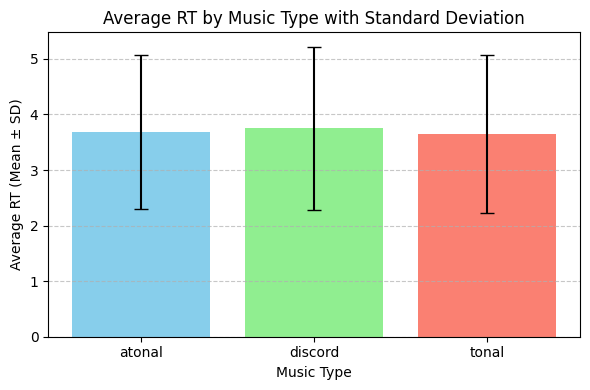

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Define the file path
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Project_2\data\combined_data_trial.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Ensure the required columns are present
required_columns = ["participant_id", "music_type", "RT"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Perform ANOVA to check for significant differences between music types
tonal = data[data["music_type"] == "tonal"]["RT"]
atonal = data[data["music_type"] == "atonal"]["RT"]
discord = data[data["music_type"] == "discord"]["RT"]

f_stat, p_value = f_oneway(tonal, atonal, discord)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("Significant differences detected in reaction time (RT) based on music type.")
    conclusion = "Music type has a significant effect on reaction time (RT)."
else:
    print("No significant differences detected in reaction time (RT) based on music type.")
    conclusion = "Music type does not have a significant effect on reaction time (RT)."

# Calculate mean and standard deviation of RT for each music type
summary_stats = data.groupby("music_type")["RT"].agg(["mean", "std"]).reset_index()

# Plot the bar chart with error bars
plt.figure(figsize=(6, 4))
plt.bar(
    summary_stats["music_type"], 
    summary_stats["mean"], 
    yerr=summary_stats["std"], 
    capsize=5, 
    color=["skyblue", "lightgreen", "salmon"]
)

# Add labels, title, and grid
plt.xlabel("Music Type")
plt.ylabel("Average RT (Mean ± SD)")
plt.title("Average RT by Music Type with Standard Deviation")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


2. Correlation between Music type and Heart Beat (average PPG)

ANOVA F-statistic: 0.01, p-value: 0.9905
No significant differences detected between music types.


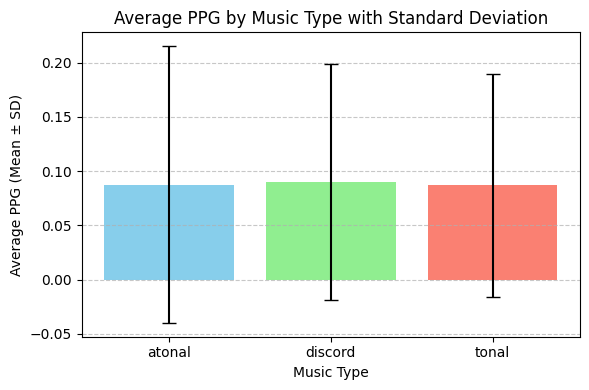

In [6]:
# Import necessary libraries for file handling and data processing
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Define the file path
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Project_2\data\combined_data_trial.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Ensure the required columns are present
required_columns = ["participant_id", "music_type", "PPG_data"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Group data by participant_id and music_type, then calculate the mean PPG_data for each group
average_ppg = data.groupby(["participant_id", "music_type"])["PPG_data"].mean().reset_index()

# Calculate the overall mean PPG for each participant across all music types
participant_means = average_ppg.groupby("participant_id")["PPG_data"].mean()

# Filter participants to include only those with average PPG in the range [-1, 1]
valid_participants = participant_means[(participant_means >= -1) & (participant_means <= 1)].index
filtered_data = average_ppg[average_ppg["participant_id"].isin(valid_participants)]

# Perform ANOVA to check for significant differences between music types
tonal = filtered_data[filtered_data["music_type"] == "tonal"]["PPG_data"]
atonal = filtered_data[filtered_data["music_type"] == "atonal"]["PPG_data"]
discord = filtered_data[filtered_data["music_type"] == "discord"]["PPG_data"]

f_stat, p_value = f_oneway(tonal, atonal, discord)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant differences detected between music types!")
else:
    print("No significant differences detected between music types.")

# Calculate the mean and standard deviation for each music type
summary_stats = filtered_data.groupby("music_type")["PPG_data"].agg(["mean", "std"]).reset_index()

# Plot the bar chart with error bars
plt.figure(figsize=(6, 4))
plt.bar(
    summary_stats["music_type"], 
    summary_stats["mean"], 
    yerr=summary_stats["std"], 
    capsize=5, 
    color=["skyblue", "lightgreen", "salmon"]
)

# Add labels, title, and grid
plt.xlabel("Music Type")
plt.ylabel("Average PPG (Mean ± SD)")
plt.title("Average PPG by Music Type with Standard Deviation")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


ANOVA Test for Valence Rating by Music Type:
F-statistic: 141.05, p-value: 0.0000
Result: Significant differences exist between valence ratings of different music types.


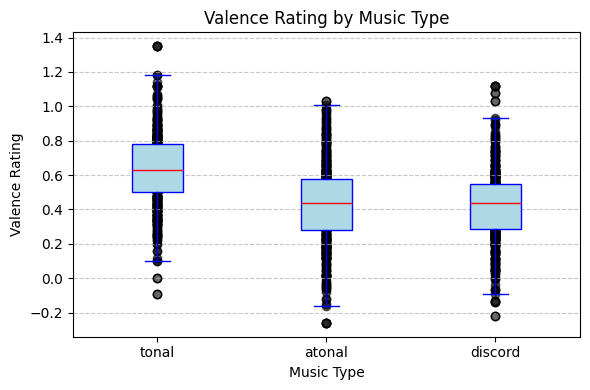

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Define the file path
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Project_2\data\combined_data_trial.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Ensure the required columns are present
required_columns = ["participant_id", "music_type", "valence_rating"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Group data by music type for ANOVA
tonal_valence = data[data["music_type"] == "tonal"]["valence_rating"]
atonal_valence = data[data["music_type"] == "atonal"]["valence_rating"]
discord_valence = data[data["music_type"] == "discord"]["valence_rating"]

# Perform ANOVA
print("ANOVA Test for Valence Rating by Music Type:")
f_stat, p_value = f_oneway(tonal_valence, atonal_valence, discord_valence)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant differences exist between valence ratings of different music types.")
else:
    print("Result: No significant differences found between valence ratings of different music types.")

# Plot valence_rating by music type using boxplots
music_types = ["tonal", "atonal", "discord"]
valence_data = [tonal_valence, atonal_valence, discord_valence]

plt.figure(figsize=(6, 4))
plt.boxplot(valence_data, tick_labels=music_types, patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"), whiskerprops=dict(color="blue"), capprops=dict(color="blue"))

# Add scatter points for individual data
for i, valence in enumerate(valence_data, start=1):
    plt.scatter([i] * len(valence), valence, alpha=0.6, color="black", label="_nolegend_")

plt.title("Valence Rating by Music Type")
plt.xlabel("Music Type")
plt.ylabel("Valence Rating")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


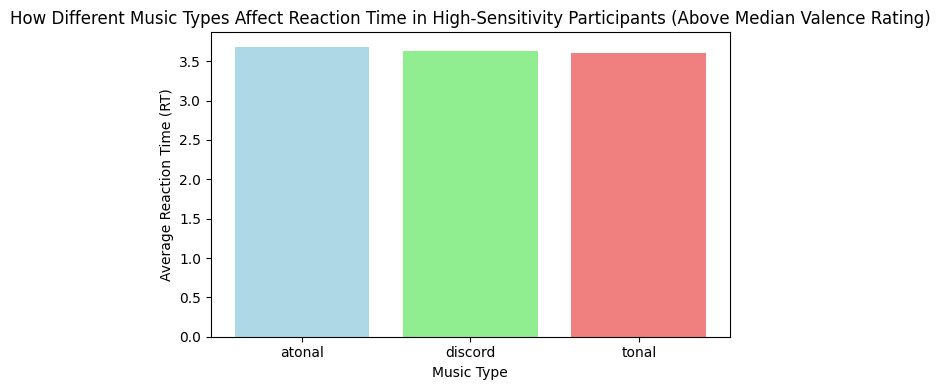

F-statistic: 0.21, p-value: 0.8113
Result: No significant differences found between reaction times of different music types for high-sensitivity participants.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Define the file path
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Project_2\data\combined_data_trial.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Ensure the required columns are present
required_columns = ["participant_id", "music_type", "RT", "valence_rating"]
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The input file must contain the following columns: {required_columns}")

# Calculate the median valence_rating to split participants into high and low sensitivity groups
median_valence = data["valence_rating"].median()

# Filter participants with high valence_rating (e.g., above the median)
high_sensitivity_data = data[data["valence_rating"] > median_valence]

# Group the data by music type and calculate the average RT for each music type
avg_rt_by_music = high_sensitivity_data.groupby("music_type")["RT"].mean().reset_index()

# Plotting the data
plt.figure(figsize=(6, 4))

# Create a bar plot showing the average RT for each music type
plt.bar(avg_rt_by_music["music_type"], avg_rt_by_music["RT"], color=["lightblue", "lightgreen", "lightcoral"])

# Adding labels and title
plt.xlabel("Music Type")
plt.ylabel("Average Reaction Time (RT)")
plt.title("How Different Music Types Affect Reaction Time in High-Sensitivity Participants (Above Median Valence Rating)")

# Display the plot
plt.tight_layout()
plt.show()

# Optional: Perform ANOVA to check if there are significant differences between music types
tonal_rt = high_sensitivity_data[high_sensitivity_data["music_type"] == "tonal"]["RT"]
atonal_rt = high_sensitivity_data[high_sensitivity_data["music_type"] == "atonal"]["RT"]
discord_rt = high_sensitivity_data[high_sensitivity_data["music_type"] == "discord"]["RT"]

# Perform ANOVA test
f_stat, p_value = f_oneway(tonal_rt, atonal_rt, discord_rt)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant differences exist between reaction times of different music types for high-sensitivity participants.")
else:
    print("Result: No significant differences found between reaction times of different music types for high-sensitivity participants.")
